In [35]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For advanced data visualization
import matplotlib.pyplot as plt  # For creating visualizations
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split, KFold, cross_val_score  # For splitting data and cross-validation
from sklearn.svm import SVC  # Support Vector Classifier for SVM classification
from sklearn.ensemble import RandomForestClassifier  # For ensemble method based classification
from sklearn.linear_model import LogisticRegression  # For binary classification tasks
from sklearn.neighbors import KNeighborsClassifier  # For K-Nearest Neighbors classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # For evaluating model performance

# Exploratory Data Analysis

In [37]:

# Loading the Dataset
df = pd.read_csv('ModelDevDataset.csv')

# Display the shape and first five rows of the DataFrame
print("DataFrame shape:", df.shape)
print("First 5 rows:")
display(df.head())

DataFrame shape: (3000, 4)
First 5 rows:


,Soil Moisture,Temperature,Air Humidity,Pump Data
0,683.802906,29.184908,71.789699,0
1,408.571567,33.707205,77.977391,1
2,659.092074,24.760311,60.776282,1
3,842.929764,32.738515,59.323543,0
4,414.199320,25.692744,66.624914,1


In [9]:
# Calculate descriptive statistics for each numerical variable

stats = df.agg({
    'Soil Moisture': ['min', 'max', 'mean', 'var', 'std'],
    'Temperature': ['min', 'max', 'mean', 'var', 'std'],
    'Air Humidity': ['min', 'max', 'mean', 'var', 'std']
}).transpose()

# Rename the index to include units after computing the statistics
stats.index = ['Soil Moisture (Ohm)', 'Temperature (deg. C)', 'Air Humidity (%)']

# Display the statistical summary of each parameter
print("Descriptive statisticsy of each parameter:")
display(stats)

Descriptive statisticsy of each parameter:


,min,max,mean,var,std
Soil Moisture (Ohm),314.511016,984.828010,662.419754,35320.051780,187.936297
Temperature (deg. C),18.002132,38.992770,28.443043,36.223123,6.018565
Air Humidity (%),38.000201,81.267407,59.387209,154.459181,12.428161


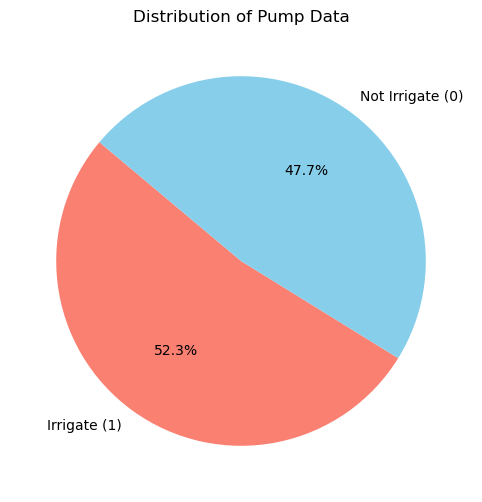

In [33]:
#Data visualization

# Count the occurrences of each category in 'Pump Data'
pump_counts = df['Pump Data'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(pump_counts, labels=['Irrigate (1)', 'Not Irrigate (0)'], autopct='%1.1f%%', startangle=140, colors=['salmon', 'skyblue'])
plt.title('Distribution of Pump Data')
plt.show()


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


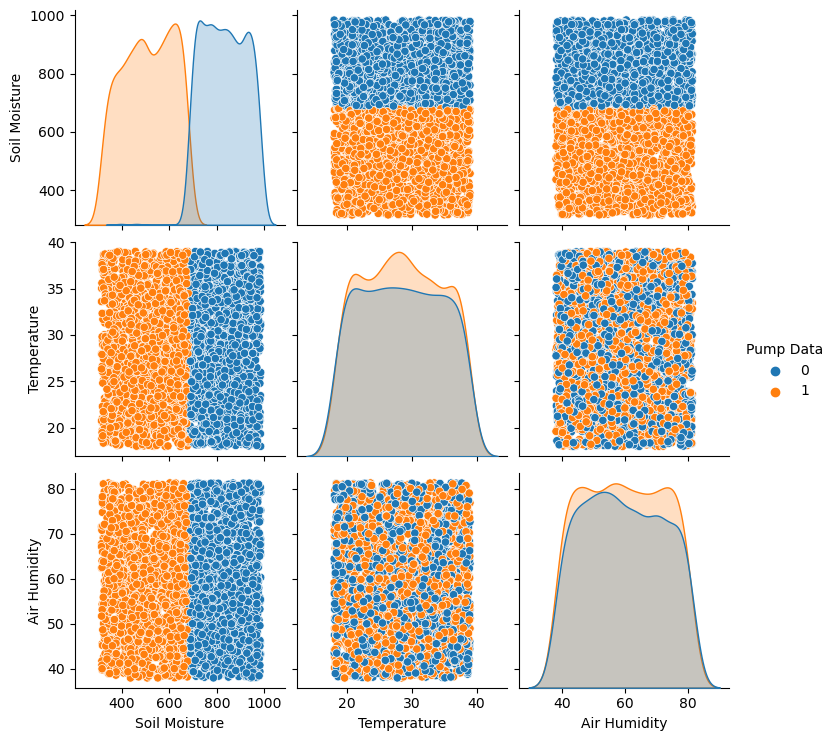

In [8]:
# Pair plot for numerical variables colored by Pump Data
sns.pairplot(df[['Soil Moisture', 'Temperature', 'Air Humidity', 'Pump Data']], hue='Pump Data')
plt.show()

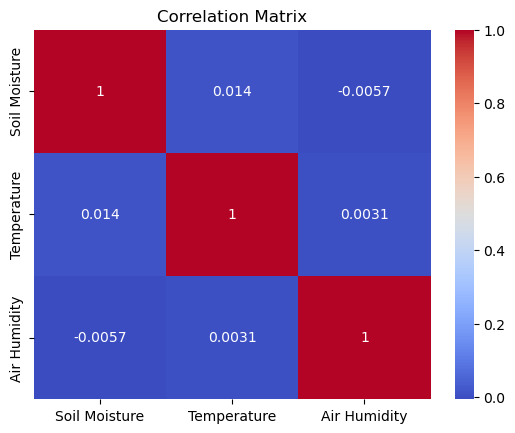

In [32]:
# Calculate the correlation matrix for selected features
correlation_matrix = df[['Soil Moisture', 'Temperature', 'Air Humidity']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Machine learning models 

# First case: splitting dataset into 70% for training and 30% for testing


Summary of model performances:


,Model,Test Accuracy,Precision,Recall,F1 Score
0,SVM,0.997778,0.997854,0.997706,0.997775
1,Random Forest,0.998889,0.998925,0.998853,0.998888
2,Logistic Regression,0.997778,0.997854,0.997706,0.997775


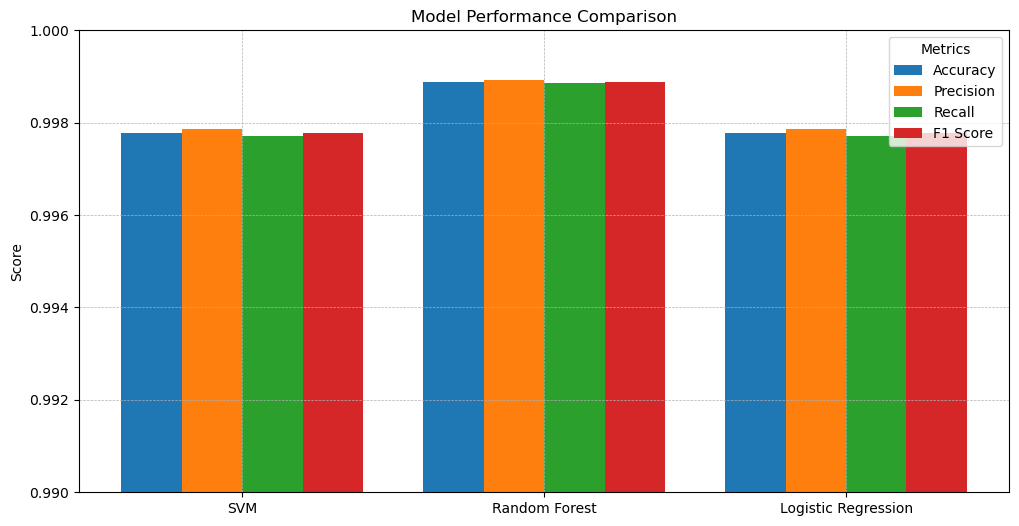

In [38]:


# Load data from CSV file
data_df = pd.read_csv('ModelDevDataset.csv')

# Split data into features (X) and target (y)
X = data_df[['Soil Moisture', 'Temperature', 'Air Humidity']]
y = data_df['Pump Data']

# Split data into training and testing sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Initialize machine learning models for comparison
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Train each model on the training data and make predictions on the test set
results_list = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    results_df = pd.DataFrame({
        'Model': [name],
        'Test Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    })
    results_list.append(results_df)

# Concatenate all results into a single DataFrame
results = pd.concat(results_list, ignore_index=True)

# Display a summary of model performances
print("\nSummary of model performances:")
display (results)

# Prepare data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
performance = {metric: [] for metric in metrics}

for name in models.keys():
    model_perf = results[results['Model'] == name]
    performance['Accuracy'].append(model_perf['Test Accuracy'].values[0])
    performance['Precision'].append(model_perf['Precision'].values[0])
    performance['Recall'].append(model_perf['Recall'].values[0])
    performance['F1 Score'].append(model_perf['F1 Score'].values[0])

# Plot results
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # width of the bars
x = np.arange(len(models))  # x-axis positions

# Place bars for each model
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, performance[metric], width=width, label=metric)

ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(models.keys())
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.legend(title="Metrics")

# Adjust the Y-axis limits to better visualize differences
ax.set_ylim(0.99, 1.0)  # Adjust this range based on your data to focus on differences near 1

# Add grid lines for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


# Second case: Evaluating models using 5-fold cross-validation


Summary of model performances:


,Model,Test Accuracy,Precision,Recall,F1 Score
0,SVM,0.999333,0.999356,0.999310,0.999332
1,Random Forest,0.999333,0.999356,0.999310,0.999332
2,Logistic Regression,0.999000,0.999029,0.998974,0.998999


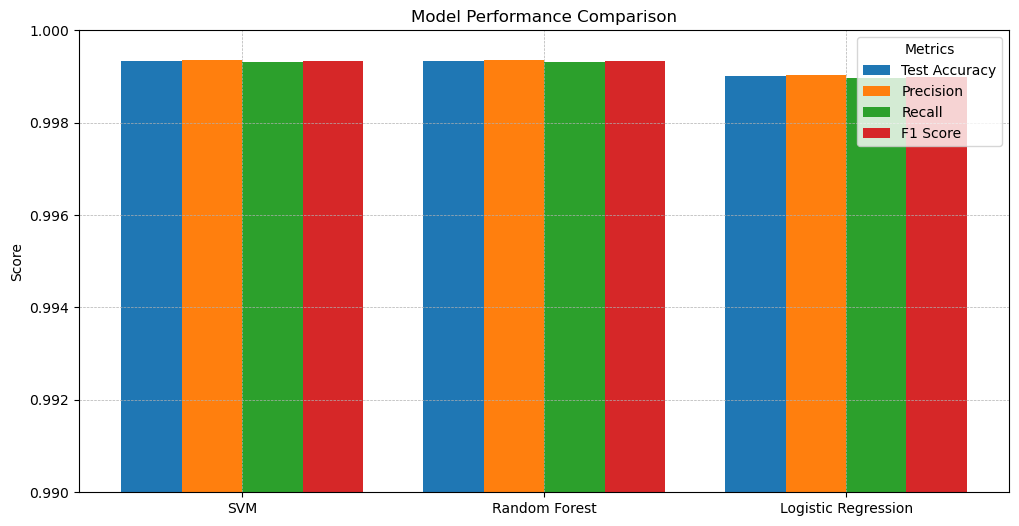

In [39]:
# Load data from CSV file
data_df = pd.read_csv('ModelDevDataset.csv')

# Split data into features (X) and target (y)
X = data_df[['Soil Moisture', 'Temperature', 'Air Humidity']]
y = data_df['Pump Data']

# Initialize machine learning models for comparison
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Initialize K-Fold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store results
results_list = []

for name, model in models.items():
    fold_accuracies = []
    fold_precisions = []
    fold_recalls = []
    fold_f1s = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        fold_accuracies.append(accuracy_score(y_test, predictions))
        fold_precisions.append(precision_score(y_test, predictions, average='macro'))
        fold_recalls.append(recall_score(y_test, predictions, average='macro'))
        fold_f1s.append(f1_score(y_test, predictions, average='macro'))
    
    # Calculate the average metrics for the 5 folds
    results_df = pd.DataFrame({
        'Model': [name],
        'Test Accuracy': [np.mean(fold_accuracies)],
        'Precision': [np.mean(fold_precisions)],
        'Recall': [np.mean(fold_recalls)],
        'F1 Score': [np.mean(fold_f1s)]
    })
    results_list.append(results_df)

# Concatenate all results into a single DataFrame
results = pd.concat(results_list, ignore_index=True)

# Display a summary of model performances
print("\nSummary of model performances:")
display(results)

# Prepare data for plotting
metrics = ['Test Accuracy', 'Precision', 'Recall', 'F1 Score']
performance = {metric: [] for metric in metrics}

for name in models.keys():
    model_perf = results[results['Model'] == name]
    performance['Test Accuracy'].append(model_perf['Test Accuracy'].values[0])
    performance['Precision'].append(model_perf['Precision'].values[0])
    performance['Recall'].append(model_perf['Recall'].values[0])
    performance['F1 Score'].append(model_perf['F1 Score'].values[0])

# Plot results
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # width of the bars
x = np.arange(len(models))  # x-axis positions

# Place bars for each model
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, performance[metric], width=width, label=metric)

ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(models.keys())
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.legend(title="Metrics")

# Adjust the Y-axis limits to better visualize differences
ax.set_ylim(0.99, 1.0)  # Adjust this range based on your data to focus on differences near 1

# Add grid lines for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()
